In [1]:
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr

In [2]:
def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar
    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))
    return a, b

In [3]:
y = open("bndgme.txt", "r", encoding="utf-8")
y.read()
y = '  41.80   68.00\n  42.10   67.50\n  42.10   67.00\n  42.10   66.00\n  43.00   66.00\n  44.20   66.50\n  44.20   67.00\n  44.20   68.00\n  41.80   68.00\n'
output1y = y.split('\n')

newy = [] 
for string in output1y:
    output2y = string.split(' ')
    newy.append(output2y)
newy = [['', '', '41.80', '', '', '68.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '66.00'], ['', '', '43.00', '', '', '66.00'], ['', '', '44.20', '', '', '66.50'], ['', '', '44.20', '', '', '67.00'], ['', '', '44.20', '', '', '68.00'], ['', '', '41.80', '', '', '68.00']]
lon_y = []; lat_y = []

for i in range(9): 
    y1 = newy[i][2]
    lat_y.append(y1)
    y3 = newy[i][5]
    lon_y.append(y3)
lonlist_y = [float(i) for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y = pd.DataFrame({'lon': lonlist_y, 'lat': latlist_y,})

lonlist_y_plot = [float(i)*-1 for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y_plot = pd.DataFrame({'lon': lonlist_y_plot, 'lat': latlist_y,})
x_y = df_y_plot['lon']; y_y = df_y_plot['lat']

In [4]:
polygon_y = Polygon(df_y.values)
print(polygon_y)

POLYGON ((68 41.8, 67.5 42.1, 67 42.1, 66 42.1, 66 43, 66.5 44.2, 67 44.2, 68 44.2, 68 41.8))


In [17]:
filelen = []; years = []
Bottles = []; MK3 = []
SBE17 = []; SBE19 = []
MK5 = []; SBE19V2 = []
SBE911 = []; SBE19plus = []

for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = [];gear_intermediate = []
    Bottles_intermediate = []; MK3_intermediate = []
    SBE17_intermediate = []; SBE19_intermediate = []
    MK5_intermediate = []; SBE19V2_intermediate = []
    SBE911_intermediate = []; SBE19plus_intermediate = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        gear = npfile[i]['gear']
#         if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
        if yd > 59 and yd <= 151:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            yd_intermediate.append(npfile[i]['yd'])
            gear_intermediate.append(npfile[i]['gear'])
            
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'gear': gear_intermediate})
#     print(month_df)
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_y.contains(point) == True:
            a = month_df['gear'].iloc[ii]
#             print(a)
            if a == 'Bottle':
                Bottles_intermediate.append(i)
            if a == 'MK-3':
                MK3_intermediate.append(i)
            if a == 'SBE-17':
                SBE17_intermediate.append(i)
            if a == 'SBE-19':
                SBE19_intermediate.append(i)
            if a == 'MK-5':
                MK5_intermediate.append(i)
            if a == 'SBE-19+V2':
                SBE19V2_intermediate.append(i)
            if a == 'SBE-911+':
                SBE911_intermediate.append(i)
            if a == 'SBE-19+':
                SBE19plus_intermediate.append(i)
    Bottles.append(len(Bottles_intermediate))
    MK3.append(len(MK3_intermediate))
    SBE17.append(len(SBE17_intermediate))
    SBE19.append(len(SBE19_intermediate))
    MK5.append(len(MK5_intermediate))
    SBE19V2.append(len(SBE19V2_intermediate))
    SBE911.append(len(SBE911_intermediate))
    SBE19plus.append(len(SBE19plus_intermediate))

In [18]:
years = [1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [19]:
df = pd.DataFrame(index=years, 
                  data={'Bottle': Bottles,'MK-3': MK3, 
                        'SBE-17': SBE17,'SBE-19': SBE19,
                        'SBE-19+V2': SBE19V2,'SBE-911+': SBE911,
                        'SBE-19+': SBE19plus,'MK-5': MK5})

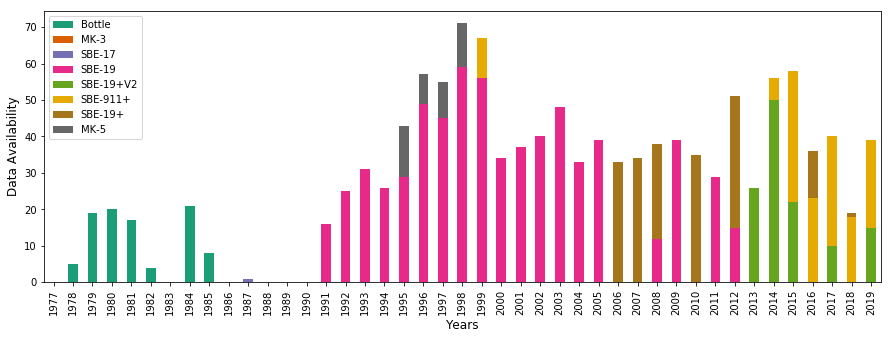

In [21]:
ax = df.plot(kind="bar", stacked=True, cmap = 'Dark2') #tab10
plt.gcf().set_size_inches(15, 5)
# plt.title('Data Collection Methods', fontsize = 20)
plt.xlabel('Years',fontsize=12); plt.ylabel('Data Availability',fontsize=12)
# ax.legend(bbox_to_anchor=(1, 1))
plt.savefig('datacollection_count_WinterEGoM')
plt.show()

In [45]:
filelen = []
Bottles = []; MK3 = []
SBE17 = []; SBE19 = []
MK5 = []; SBE19V2 = []
SBE911 = []; SBE19plus = []

for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = [];gear_intermediate = []
    Bottles_intermediate = []; MK3_intermediate = []
    SBE17_intermediate = []; SBE19_intermediate = []
    MK5_intermediate = []; SBE19V2_intermediate = []
    SBE911_intermediate = []; SBE19plus_intermediate = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        gear = npfile[i]['gear']
#         if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
        if yd > 334 and yd <= 365:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            yd_intermediate.append(npfile[i]['yd'])
            gear_intermediate.append(npfile[i]['gear'])
            
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'gear': gear_intermediate})
#     print(month_df)
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_y.contains(point) == True:
            a = month_df['gear'].iloc[ii]
#             print(a)
            if a == 'Bottle':
                Bottles_intermediate.append(i)
            if a == 'MK-3':
                MK3_intermediate.append(i)
            if a == 'SBE-17':
                SBE17_intermediate.append(i)
            if a == 'SBE-19':
                SBE19_intermediate.append(i)
            if a == 'MK-5':
                MK5_intermediate.append(i)
            if a == 'SBE-19+V2':
                SBE19V2_intermediate.append(i)
            if a == 'SBE-911+':
                SBE911_intermediate.append(i)
            if a == 'SBE-19+':
                SBE19plus_intermediate.append(i)
    Bottles.append(len(Bottles_intermediate))
    MK3.append(len(MK3_intermediate))
    SBE17.append(len(SBE17_intermediate))
    SBE19.append(len(SBE19_intermediate))
    MK5.append(len(MK5_intermediate))
    SBE19V2.append(len(SBE19V2_intermediate))
    SBE911.append(len(SBE911_intermediate))
    SBE19plus.append(len(SBE19plus_intermediate))

In [46]:
print(sum(Bottles))
print(sum(MK3))
print(sum(SBE17))
print(sum(SBE19))
print(sum(MK5))
print(sum(SBE19V2))
print(sum(SBE911))
print(sum(SBE19plus))

110
0
11
20
0
0
0
0


In [47]:
Bottlemonth = [46, 58, 6, 20, 68, 81, 7, 31, 34, 37, 46, 110]
MK3month = [0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0]
SBE17month = [7, 0, 0, 0, 1, 0, 0, 0, 22, 0, 4, 11]
SBE19month = [118, 74, 34, 552, 76, 146, 36, 331, 143, 618, 142, 20]
SBE19V2month = [5, 12, 17, 10, 17, 17, 2, 0, 0, 0, 2, 0]
SBE911plusmonth = [0, 6, 12, 33, 78, 65, 3, 24, 3, 25, 61, 0]
SBE19plusmonth = [3, 10, 10, 43, 95, 71, 9, 25, 21, 57, 82, 0]
MK5month = [0, 58, 5, 154, 19, 135, 28, 168, 128, 151, 216, 0]

In [48]:
dfmonth = pd.DataFrame(index=[1,2,3,4,5,6,7,8,9,10,11,12], 
                  data={'Bottle': Bottlemonth,'MK-3': MK3month, 
                        'SBE-17': SBE17month,'SBE-19': SBE19month,
                        'SBE-19+V2': SBE19V2month,'SBE-911+': SBE911plusmonth,
                        'SBE-19+': SBE19plusmonth,'MK-5': MK5month})

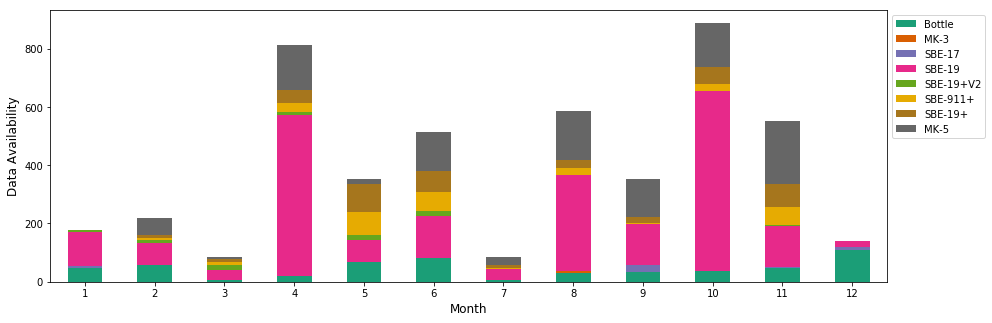

In [49]:
ax = dfmonth.plot(kind="bar", stacked=True, cmap = 'Dark2') #tab10
plt.gcf().set_size_inches(15, 5)
# plt.title('Data Collection Methods', fontsize = 20)
plt.xticks(rotation = 360)
plt.xlabel('Month',fontsize=12); plt.ylabel('Data Availability',fontsize=12)
ax.legend(bbox_to_anchor=(1, 1))
plt.savefig('ANNUALtrend_datacollection_count_EGoM')
plt.show()

In [57]:
for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        floordepth = npfile[i]['depth']
#         if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
        if yd > 59 and yd <= 151:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
#         if type(month_df['p'].iloc[ii]) != int or type(month_df['p'].iloc[ii]) != float or type(month_df['t'].iloc[ii]) != int or type(month_df['t'].iloc[ii]) != float:
            pass
        elif polygon_y.contains(point) == True:
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'lat': month_df['t'].iloc[ii]}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for ii in range(len(l)):
                    val = df_final[1][ii]
                    numrange.append(ii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
            dffin = pd.DataFrame(d)
            pnew = []; allmixedcount = []
            inconclusivecount = []
            for i in range(len(dffin)):
                b = dffin.at[i,'temp']
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
                    if dffin.at[i,'pressure'] >= floordepth - 6:
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
                    else:
                        pnew.append(dffin.at[i,'pressure'])
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
                        np.array(seasonyeartemp)
                        np.array(seasonyeardepth)
                    break  
    monthly = []
    if len(seasonyeartemp) > 0:
        print('depth_',year,np.mean(seasonyeardepth))
#         print('stddepth_',year,np.std(seasonyeardepth))
    

depth_ 1978 56.0
depth_ 1979 33.68421052631579
depth_ 1980 50.0
depth_ 1981 60.375
depth_ 1982 24.5
depth_ 1984 37.4
depth_ 1985 28.571428571428573
depth_ 1987 106.0
depth_ 1991 47.75
depth_ 1992 48.56
depth_ 1993 87.25806451612904
depth_ 1994 57.76923076923077
depth_ 1995 56.41860465116279
depth_ 1996 55.18
depth_ 1997 73.57454545454546
depth_ 1998 65.5720588235294
depth_ 1999 70.07692307692308
depth_ 2000 71.44117647058823
depth_ 2001 68.70270270270271
depth_ 2002 80.35
depth_ 2003 61.25
depth_ 2004 51.27272727272727
depth_ 2005 70.07692307692308
depth_ 2006 58.42424242424242
depth_ 2007 51.470588235294116
depth_ 2008 70.5
depth_ 2009 101.33333333333333
depth_ 2010 76.45714285714286
depth_ 2011 71.96551724137932
depth_ 2012 61.375
depth_ 2013 81.42307692307692
depth_ 2014 72.2
depth_ 2015 70.60714285714286
depth_ 2016 104.90625
depth_ 2017 87.38461538461539
depth_ 2018 105.77777777777777
depth_ 2019 74.74358974358974


### SPRING

In [74]:
depth_1978 =56.0
depth_1979 =33.68421052631579
depth_1980 =50.0
depth_1981 =60.375
depth_1982 =24.5
depth_1984 =37.4
depth_1985 =28.571428571428573
depth_1987 =106.0
depth_1991 =47.75
depth_1992 =48.56
depth_1993 =87.25806451612904
depth_1994 =57.76923076923077
depth_1995 =56.41860465116279
depth_1996 =55.18
depth_1997 =73.57454545454546
depth_1998 =65.5720588235294
depth_1999 =70.07692307692308
depth_2000 =71.44117647058823
depth_2001 =68.70270270270271
depth_2002 =80.35
depth_2003 =61.25
depth_2004 =51.27272727272727
depth_2005 =70.07692307692308
depth_2006 =58.42424242424242
depth_2007 =51.470588235294116
depth_2008 =70.5
depth_2009 =101.33333333333333
depth_2010 =76.45714285714286
depth_2011 =71.96551724137932
depth_2012 =61.375
depth_2013 =81.42307692307692
depth_2014 =72.2
depth_2015 =70.60714285714286
depth_2016 =104.90625
depth_2017 =87.38461538461539
depth_2018 =105.77777777777777
depth_2019 =74.74358974358974

In [75]:
stddepth_1978 =73.71566997592845
stddepth_1979 =58.67668113132557
stddepth_1980 =59.39603428587542
stddepth_1981 =64.70884309736962
stddepth_1982 =18.200274723201296
stddepth_1984 =44.532460071278344
stddepth_1985 =31.508988027713812
stddepth_1987 =0.0
stddepth_1991 =19.866743568083823
stddepth_1992 =13.109019795545356
stddepth_1993 =35.559099141257406
stddepth_1994 =36.193186452178125
stddepth_1995 =28.621209047755606
stddepth_1996 =29.439218739633702
stddepth_1997 =53.20487065257301
stddepth_1998 =47.13442867320533
stddepth_1999 =43.7880586785968
stddepth_2000 =27.46997417124483
stddepth_2001 =37.5109820783085
stddepth_2002 =22.34228054608571
stddepth_2003 =36.53622631489647
stddepth_2004 =24.308961718566074
stddepth_2005 =26.517903594465476
stddepth_2006 =29.331987196760597
stddepth_2007 =22.812838611981896
stddepth_2008 =37.12337184095897
stddepth_2009 =50.48093487966309
stddepth_2010 =32.3210173612358
stddepth_2011 =18.775410842872873
stddepth_2012 =48.81027256975045
stddepth_2013 =36.17178360261052
stddepth_2014 =54.07180411267965
stddepth_2015 =56.82230402486226
stddepth_2016 =95.31013829041221
stddepth_2017 =35.7889937132342
stddepth_2018 =50.93629524061901
stddepth_2019 =39.156960902421176

best fit line:
y = -1915.58 + 0.99x


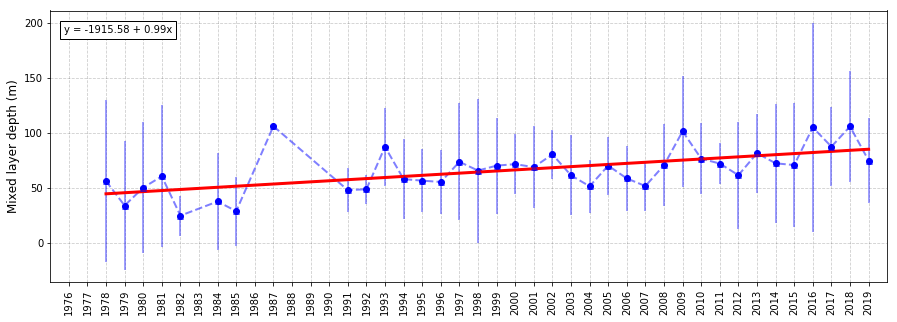

In [77]:
from matplotlib.offsetbox import AnchoredText

x = [1978, 1979, 1980, 1981, 1982, 1984, 1985, 1987,
    1991, 1992,1993, 1994, 1995, 1996, 1997, 1998,
    1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
    2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
    2016, 2017, 2018, 2019]
y = [depth_1978, depth_1979, depth_1980, depth_1981, 
    depth_1982, depth_1984, depth_1985, depth_1987,
    depth_1991, depth_1992, depth_1993, depth_1994,
    depth_1995, depth_1996, depth_1997, depth_1998,
    depth_1999, depth_2000, depth_2001, depth_2002,
    depth_2003, depth_2004, depth_2005, depth_2006,
    depth_2007, depth_2008, depth_2009, depth_2010,
    depth_2011, depth_2012, depth_2013, depth_2014,
    depth_2015, depth_2016, depth_2017, depth_2018, depth_2019]
e = [stddepth_1978, stddepth_1979, stddepth_1980, stddepth_1981, 
    stddepth_1982, stddepth_1984, stddepth_1985, stddepth_1987,
    stddepth_1991, stddepth_1992, stddepth_1993, stddepth_1994,
    stddepth_1995, stddepth_1996, stddepth_1997, depth_1998,
    stddepth_1999, stddepth_2000, stddepth_2001, stddepth_2002,
    stddepth_2003, stddepth_2004, stddepth_2005, stddepth_2006,
    stddepth_2007, stddepth_2008, stddepth_2009, stddepth_2010,
    stddepth_2011, stddepth_2012, stddepth_2013, stddepth_2014,
    stddepth_2015, stddepth_2016, stddepth_2017, stddepth_2018, stddepth_2019]

plt.figure(figsize=(15, 5))
plt.xlim((1975,2020))
# plt.ylim((0,100))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
# plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.errorbar(x, y, e, linestyle='None', marker='^',color='blue',alpha= 0.5)
a = AnchoredText("y = -1915.58 + 0.99x".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_spring_EGoM_withstd')
plt.show()

### SUMMER

In [78]:
depth_1977 =0.0
depth_1978 =11.6
depth_1979 =7.285714285714286
depth_1980 =9.3
depth_1981 =7.0
depth_1982 =27.22222222222222
depth_1983 =14.3125
depth_1986 =16.833333333333332
depth_1987 =13.785714285714286
depth_1991 =9.0
depth_1992 =7.428571428571429
depth_1993 =9.076923076923077
depth_1994 =9.384615384615385
depth_1995 =11.26923076923077
depth_1996 =26.44736842105263
depth_1997 =8.68421052631579
depth_1998 =10.693548387096774
depth_1999 =16.757575757575758
depth_2000 =30.0
depth_2001 =26.914893617021278
depth_2002 =20.558139534883722
depth_2003 =9.058823529411764
depth_2004 =59.351351351351354
depth_2005 =45.23809523809524
depth_2006 =37.5
depth_2007 =14.66
depth_2008 =10.064516129032258
depth_2009 =23.90625
depth_2010 =21.86842105263158
depth_2011 =28.074074074074073
depth_2012 =13.7
depth_2013 =14.647058823529411
depth_2014 =13.5
depth_2015 =10.2
depth_2016 =44.84
depth_2017 =91.8
depth_2018 =71.58823529411765
depth_2019 =79.78125

In [79]:
stddepth_1977 =0.0
stddepth_1978 =17.200000000000003
stddepth_1979 =2.3733211036908783
stddepth_1980 =6.293647591023825
stddepth_1981 =0.0
stddepth_1982 =38.23158799981573
stddepth_1983 =19.110595065303436
stddepth_1986 =12.354711202164497
stddepth_1987 =23.707077217659744
stddepth_1991 =0.0
stddepth_1992 =2.381904571504724
stddepth_1993 =5.525626152636299
stddepth_1994 =2.6176460811036235
stddepth_1995 =5.847798351698712
stddepth_1996 =42.55689527185994
stddepth_1997 =3.784353265736326
stddepth_1998 =4.918164848138494
stddepth_1999 =25.796441266225788
stddepth_2000 =53.09111664550546
stddepth_2001 =47.39370179327136
stddepth_2002 =36.86827736155348
stddepth_2003 =2.4845543625815147
stddepth_2004 =93.12247564979585
stddepth_2005 =70.94055510268188
stddepth_2006 =64.41932939731677
stddepth_2007 =23.748355732555464
stddepth_2008 =3.917993922758446
stddepth_2009 =50.12319783231612
stddepth_2010 =43.9839510519292
stddepth_2011 =51.4557889526072
stddepth_2012 =10.296115772464876
stddepth_2013 =6.425511437374765
stddepth_2014 =6.5
stddepth_2015 =3.340658617698013
stddepth_2016 =59.44118437581808
stddepth_2017 =83.97317031846143
stddepth_2018 =95.35078199101241
stddepth_2019 =78.72608143707839

best fit line:
y = -1876.13 + 0.95x


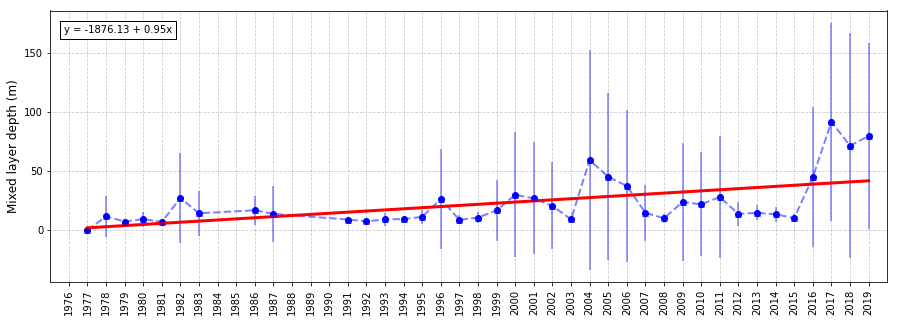

In [81]:
from matplotlib.offsetbox import AnchoredText

x = [1977, 1978, 1979, 1980, 1981, 1982, 1983, 1986,
    1987, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
    1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
    2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
    2014, 2015, 2016, 2017, 2018, 2019]
y = [depth_1977, depth_1978, depth_1979, depth_1980,
    depth_1981, depth_1982, depth_1983, depth_1986, 
    depth_1987, depth_1991, depth_1992, depth_1993,
    depth_1994, depth_1995, depth_1996, depth_1997, 
    depth_1998, depth_1999, depth_2000, depth_2001,
    depth_2002, depth_2003, depth_2004, depth_2005, 
    depth_2006, depth_2007, depth_2008, depth_2009,
    depth_2010, depth_2011, depth_2012, depth_2013,
    depth_2014, depth_2015, depth_2016, depth_2017,
    depth_2018, depth_2019]
e = [stddepth_1977, stddepth_1978, stddepth_1979, stddepth_1980,
    stddepth_1981, stddepth_1982, stddepth_1983, stddepth_1986, 
    stddepth_1987, stddepth_1991, stddepth_1992, stddepth_1993,
    stddepth_1994, stddepth_1995, stddepth_1996, stddepth_1997, 
    stddepth_1998, stddepth_1999, stddepth_2000, stddepth_2001,
    stddepth_2002, stddepth_2003, stddepth_2004, stddepth_2005, 
    stddepth_2006, stddepth_2007, stddepth_2008, stddepth_2009,
    stddepth_2010, stddepth_2011, stddepth_2012, stddepth_2013,
    stddepth_2014, stddepth_2015, stddepth_2016, stddepth_2017,
    stddepth_2018, stddepth_2019]
 
plt.figure(figsize=(15, 5))
plt.xlim((1975,2020))
# plt.ylim((0,100))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
# plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.errorbar(x, y, e, linestyle='None', marker='^',color='blue',alpha= 0.5)
a = AnchoredText("y = -1876.13 + 0.95x".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_summer_EGoM_withstd')
plt.show()

### FALL

In [82]:
depth_1977 =47.0
depth_1978 =26.733333333333334
depth_1979 =35.07692307692308
depth_1980 =32.0
depth_1982 =50.92857142857143
depth_1985 =12.0
depth_1986 =21.0
depth_1987 =14.333333333333334
depth_1989 =45.0
depth_1990 =24.857142857142858
depth_1991 =29.387755102040817
depth_1992 =38.40909090909091
depth_1993 =45.21951219512195
depth_1994 =28.82857142857143
depth_1995 =19.27777777777778
depth_1996 =28.80952380952381
depth_1997 =46.6
depth_1998 =34.4
depth_1999 =76.45652173913044
depth_2000 =25.225
depth_2001 =24.36842105263158
depth_2002 =38.08474576271186
depth_2003 =25.2
depth_2004 =26.443037974683545
depth_2005 =26.226666666666667
depth_2006 =27.29113924050633
depth_2007 =30.757142857142856
depth_2008 =25.306818181818183
depth_2009 =30.950617283950617
depth_2010 =53.0375
depth_2011 =55.824561403508774
depth_2012 =32.705128205128204
depth_2013 =57.95652173913044
depth_2014 =51.306451612903224
depth_2015 =35.073170731707314
depth_2016 =53.829268292682926
depth_2017 =39.074074074074076
depth_2018 =92.45454545454545
depth_2019 =48.121212121212125

In [83]:
stddepth_1977 =45.2538732428315
stddepth_1978 =21.62549935197387
stddepth_1979 =23.40105697304336
stddepth_1980 =13.510230042063446
stddepth_1982 =30.205165796868698
stddepth_1985 =11.00267347190726
stddepth_1986 =25.16129784194188
stddepth_1987 =17.369193674114204
stddepth_1989 =18.096961070853858
stddepth_1990 =14.951622668063932
stddepth_1991 =20.22104008965345
stddepth_1992 =33.86021947374112
stddepth_1993 =20.75467880852347
stddepth_1994 =21.48552431526959
stddepth_1995 =8.503630306819653
stddepth_1996 =15.438415436883867
stddepth_1997 =29.97637164739684
stddepth_1998 =29.93504078277941
stddepth_1999 =47.37670796358606
stddepth_2000 =15.662036106458189
stddepth_2001 =18.835047193200314
stddepth_2002 =29.129336447720807
stddepth_2003 =14.782083750270122
stddepth_2004 =18.78846052763658
stddepth_2005 =18.59718497216417
stddepth_2006 =20.57228804511039
stddepth_2007 =26.49174303400197
stddepth_2008 =16.409086974313304
stddepth_2009 =25.559855307154308
stddepth_2010 =44.629710885798936
stddepth_2011 =49.43438777797366
stddepth_2012 =24.058746996359677
stddepth_2013 =37.58408342679299
stddepth_2014 =32.09390893354618
stddepth_2015 =24.8541013388353
stddepth_2016 =33.02320133321227
stddepth_2017 =24.817744437347162
stddepth_2018 =48.08394862844024
stddepth_2019 =22.90131341444241

best fit line:
y = -942.44 + 0.49x


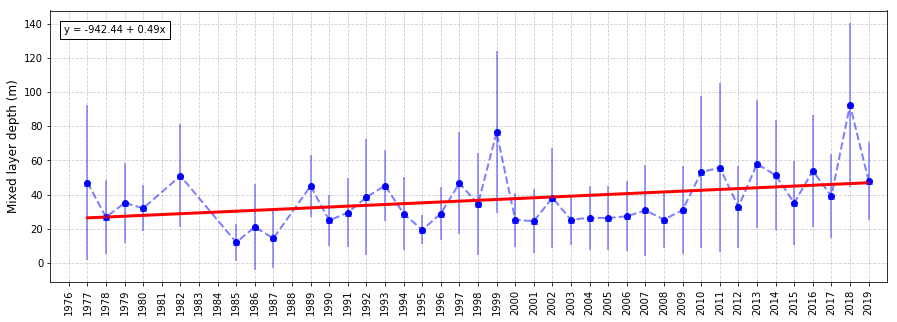

In [85]:
from matplotlib.offsetbox import AnchoredText

x = [1977, 1978, 1979, 1980, 1982, 1985, 1986,
    1987, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
    1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
    2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
    2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
y = [depth_1977, depth_1978, depth_1979, depth_1980,
    depth_1982, depth_1985, depth_1986, depth_1987,
    depth_1989, depth_1990, depth_1991,depth_1992,
    depth_1993, depth_1994, depth_1995, depth_1996,
    depth_1997, depth_1998, depth_1999, depth_2000,
    depth_2001, depth_2002, depth_2003, depth_2004, 
    depth_2005, depth_2006, depth_2007, depth_2008,
    depth_2009, depth_2010, depth_2011, depth_2012, 
    depth_2013, depth_2014, depth_2015, depth_2016,
    depth_2017, depth_2018, depth_2019]
e = [stddepth_1977, stddepth_1978, stddepth_1979, stddepth_1980,
    stddepth_1982, stddepth_1985, stddepth_1986, stddepth_1987,
    stddepth_1989, stddepth_1990, stddepth_1991, stddepth_1992,
    stddepth_1993, stddepth_1994, stddepth_1995, stddepth_1996,
    stddepth_1997, stddepth_1998, stddepth_1999, stddepth_2000,
    stddepth_2001, stddepth_2002, stddepth_2003, stddepth_2004, 
    stddepth_2005, stddepth_2006, stddepth_2007, stddepth_2008,
    stddepth_2009, stddepth_2010, stddepth_2011, stddepth_2012, 
    stddepth_2013, stddepth_2014, stddepth_2015, stddepth_2016,
    stddepth_2017, stddepth_2018, stddepth_2019]
 
plt.figure(figsize=(15, 5))
plt.xlim((1975,2020))
# plt.ylim((0,100))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
# plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.errorbar(x, y, e, linestyle='None', marker='^',color='blue',alpha= 0.5)
a = AnchoredText("y = -942.44 + 0.49x".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_fall_EGoM_withstd')
plt.show()

### WINTER

In [86]:
depth_1979 =61.0
depth_1980 =32.0
depth_1981 =47.9375
depth_1982 =52.61904761904762
depth_1983 =76.34146341463415
depth_1984 =40.96
depth_1985 =54.72
depth_1986 =68.96774193548387
depth_1987 =46.81818181818182
depth_1988 =100.42857142857143
depth_1989 =42.55555555555556
depth_1990 =50.125
depth_1991 =89.28571428571429
depth_1992 =52.25
depth_1993 =31.6
depth_1995 =31.88888888888889
depth_1996 =56.0
depth_1997 =73.26153846153846
depth_1998 =55.48518518518518
depth_1999 =52.84848484848485
depth_2002 =51.76470588235294
depth_2003 =30.666666666666668
depth_2004 =38.0
depth_2005 =51.64705882352941
depth_2006 =49.470588235294116
depth_2007 =51.5
depth_2008 =47.1764705882353
depth_2009 =54.94444444444444
depth_2010 =28.0
depth_2011 =40.04545454545455
depth_2012 =57.705882352941174
depth_2013 =58.75
depth_2017 =41.0

In [87]:
stddepth_1979 =46.11579628139003
stddepth_1980 =21.324335223571982
stddepth_1981 =27.736412777250052
stddepth_1982 =24.415990448252575
stddepth_1983 =62.9725490934092
stddepth_1984 =37.09822637269873
stddepth_1985 =63.56698514165981
stddepth_1986 =57.18362266727037
stddepth_1987 =37.88215742588679
stddepth_1988 =36.91247231282264
stddepth_1989 =25.9833755018307
stddepth_1990 =24.17352632530058
stddepth_1991 =45.78432135166637
stddepth_1992 =23.519938350259338
stddepth_1993 =7.031358332498779
stddepth_1995 =20.954683615652584
stddepth_1996 =28.77498913987632
stddepth_1997 =28.47010681835459
stddepth_1998 =45.03692068698421
stddepth_1999 =26.488558092609118
stddepth_2002 =27.32490656948605
stddepth_2003 =17.074997966487594
stddepth_2004 =0.0
stddepth_2005 =31.84510522268059
stddepth_2006 =23.557483254818163
stddepth_2007 =21.232555865260984
stddepth_2008 =27.60697971020595
stddepth_2009 =31.80054545692612
stddepth_2010 =9.0
stddepth_2011 =20.855514362845216
stddepth_2012 =41.818606477868975
stddepth_2013 =25.103535607559348
stddepth_2017 =20.47559522944327

best fit line:
y = 737.89 + -0.34x


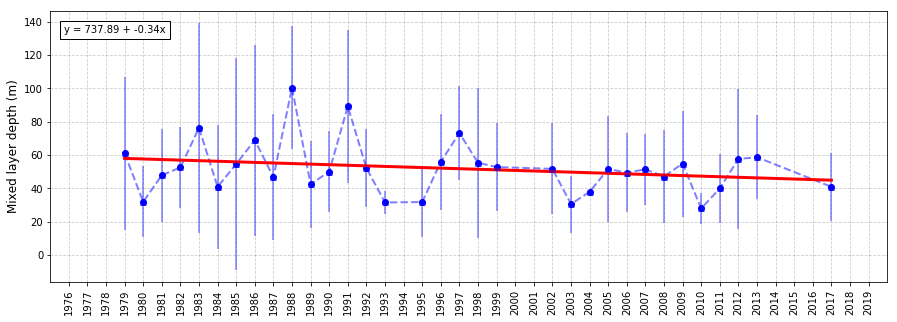

In [89]:
from matplotlib.offsetbox import AnchoredText

x = [1979, 1980, 1981, 1982, 1983, 1984, 1985,
    1986, 1987, 1988, 1989, 1990, 1991, 1992, 
    1993, 1995, 1996, 1997, 1998, 1999, 2002, 2003,
    2004, 2005, 2006, 2007, 2008, 2009, 2010,
    2011, 2012, 2013, 2017]
y = [depth_1979, depth_1980, depth_1981, depth_1982,
    depth_1983, depth_1984, depth_1985, depth_1986,
    depth_1987, depth_1988, depth_1989, depth_1990,
    depth_1991, depth_1992, depth_1993, depth_1995,
    depth_1996, depth_1997, depth_1998, depth_1999,
    depth_2002, depth_2003, depth_2004, depth_2005,
    depth_2006, depth_2007, depth_2008, depth_2009,
    depth_2010, depth_2011, depth_2012, depth_2013, depth_2017]
e = [stddepth_1979, stddepth_1980, stddepth_1981, stddepth_1982,
    stddepth_1983, stddepth_1984, stddepth_1985, stddepth_1986,
    stddepth_1987, stddepth_1988, stddepth_1989, stddepth_1990,
    stddepth_1991, stddepth_1992, stddepth_1993, stddepth_1995,
    stddepth_1996, stddepth_1997, stddepth_1998, stddepth_1999,
    stddepth_2002, stddepth_2003, stddepth_2004, stddepth_2005,
    stddepth_2006, stddepth_2007, stddepth_2008, stddepth_2009,
    stddepth_2010, stddepth_2011, stddepth_2012, stddepth_2013, stddepth_2017]
 
plt.figure(figsize=(15, 5))
plt.xlim((1975,2020))
# plt.ylim((0,100))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
# plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.errorbar(x, y, e, linestyle='None', marker='^',color='blue',alpha= 0.5)
a = AnchoredText("y = 737.89 + -0.34x".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_winter_EGoM_withstd')
plt.show()

### SEASONAL CYCLE

In [70]:
for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        floordepth = npfile[i]['depth']
#         if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
        if yd >= 0 and yd <= 31:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
#         if type(month_df['p'].iloc[ii]) != int or type(month_df['p'].iloc[ii]) != float or type(month_df['t'].iloc[ii]) != int or type(month_df['t'].iloc[ii]) != float:
            pass
        elif polygon_y.contains(point) == True:
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'lat': month_df['t'].iloc[ii]}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for ii in range(len(l)):
                    val = df_final[1][ii]
                    numrange.append(ii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
            dffin = pd.DataFrame(d)
            pnew = []; allmixedcount = []
            inconclusivecount = []
            for i in range(len(dffin)):
                b = dffin.at[i,'temp']
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
                    if dffin.at[i,'pressure'] >= floordepth - 6:
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
                    else:
                        pnew.append(dffin.at[i,'pressure'])
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
                        np.array(seasonyeartemp)
                        np.array(seasonyeardepth)
                    break  
    monthly = []
    if len(seasonyeartemp) > 0:
        print(np.mean(seasonyeardepth), ',')
#         print(np.std(seasonyeardepth), ',')


# highly.append(np.mean(seasonyeardepth))
#         monthly.append(seasonyeardepth)
# print(monthly)
#         print('depth_',year,np.mean(seasonyeardepth))
#         print('stddepth_',year,np.std(seasonyeardepth))

50.65217391304348 ,
33.89473684210526 ,
45.0 ,
34.714285714285715 ,
43.5 ,
28.75 ,
67.18181818181819 ,
63.52777777777778 ,
52.05 ,
51.76470588235294 ,
30.666666666666668 ,
38.0 ,
38.92307692307692 ,
50.0 ,


In [71]:
january = statistics.mean([50.65217391304348 ,
33.89473684210526 ,
45.0 ,
34.714285714285715 ,
43.5 ,
28.75 ,
67.18181818181819 ,
63.52777777777778 ,
52.05 ,
51.76470588235294 ,
30.666666666666668 ,
38.0 ,
38.92307692307692 ,
50.0])
february = statistics.mean([52.5 ,
34.05555555555556 ,
36.1 ,
49.125 ,
33.55555555555556 ,
38.166666666666664 ,
56.0 ,
77.72 ,
39.400000000000006 ,
54.07692307692308 ,
93.0 ,
41.0 ,
51.5 ,
47.1764705882353 ,
54.94444444444444 ,
28.0 ,
40.04545454545455 ,
57.705882352941174 ,
58.75 ,
41.0])
march = statistics.mean([50.0 ,
46.0 ,
65.0 ,
41.5 ,
41.6 ,
51.142857142857146 ,
40.95 ,
76.75 ,
67.27272727272727 ,
58.0 ,
43.588235294117645])
april = statistics.mean([41.92307692307692 ,
36.0 ,
37.666666666666664 ,
47.75 ,
48.56 ,
87.25806451612904 ,
57.76923076923077 ,
57.42857142857143 ,
63.45454545454545 ,
71.12941176470588 ,
72.508 ,
80.5909090909091 ,
71.44117647058823 ,
68.70270270270271 ,
80.35 ,
58.142857142857146 ,
51.27272727272727 ,
70.07692307692308 ,
58.42424242424242 ,
51.470588235294116 ,
72.39393939393939 ,
111.38461538461539 ,
76.45714285714286 ,
69.62962962962963 ,
76.53333333333333 ,
73.5 ,
59.4 ,
80.22222222222223 ,
77.75 ,
51.81818181818182])
may = statistics.mean([57.5 ,
33.68421052631579 ,
77.25 ,
66.18181818181819 ,
7.5 ,
37.4 ,
21.75 ,
106.0 ,
85.14285714285714 ,
30.7 ,
110.7909090909091 ,
21.95 ,
26.9 ,
69.61538461538461 ,
81.23076923076923 ,
103.5 ,
36.111111111111114 ,
125.0 ,
85.0 ,
76.83333333333333 ,
104.90625 ,
93.52380952380952 ,
113.78571428571429 ,
83.75])
june = statistics.mean([11.285714285714286 ,
7.0 ,
32.04761904761905 ,
14.3125 ,
16.833333333333332 ,
13.785714285714286 ,
13.333333333333334 ,
11.555555555555555 ,
38.22727272727273 ,
15.333333333333334 ,
10.15625 ,
21.333333333333332 ,
44.6 ,
48.95 ,
32.285714285714285 ,
93.68181818181819 ,
72.0 ,
70.21428571428571 ,
22.444444444444443 ,
14.2 ,
36.411764705882355 ,
29.869565217391305 ,
28.074074074074073 ,
10.2 ,
46.416666666666664 ,
91.8 ,
75.6875 ,
115.04761904761905])
july = statistics.mean([7.333333333333333 ,
8.0 ,
9.0 ,
6.0 ,
8.0 ,
7.0 ,
11.2 ,
11.333333333333334 ,
6.0 ,
7.0 ,
10.75 ,
8.166666666666666 ,
12.0 ,
13.5 ,
6.0])
august = statistics.mean([0.0 ,
14.444444444444445 ,
7.166666666666667 ,
4.666666666666667 ,
10.333333333333334 ,
7.666666666666667 ,
10.8 ,
8.333333333333334 ,
11.083333333333334 ,
10.25 ,
7.4375 ,
11.266666666666667 ,
12.944444444444445 ,
11.75 ,
10.5 ,
9.363636363636363 ,
9.058823529411764 ,
9.214285714285714 ,
10.285714285714286 ,
8.875 ,
10.0 ,
9.6 ,
9.733333333333333 ,
9.6 ,
13.7 ,
14.8125 ,
7.0 ,
12.454545454545455])
september = statistics.mean([6.5 ,
10.375 ,
15.8 ,
14.333333333333334 ,
20.5 ,
30.0 ,
19.235294117647058 ,
8.904761904761905 ,
13.153846153846153 ,
12.08 ,
13.5 ,
10.619047619047619 ,
12.153846153846153 ,
12.392857142857142 ,
12.105263157894736 ,
19.903225806451612 ,
8.875 ,
11.333333333333334 ,
6.5 ,
20.0])

october = statistics.mean([14.0 ,
35.07692307692308 ,
32.0 ,
7.5 ,
25.238095238095237 ,
41.23529411764706 ,
44.90909090909091 ,
26.967741935483872 ,
19.27777777777778 ,
25.53125 ,
46.6 ,
25.375 ,
64.28571428571429 ,
24.26086956521739 ,
25.878048780487806 ,
41.125 ,
30.595744680851062 ,
18.951219512195124 ,
25.78787878787879 ,
23.137254901960784 ,
19.764705882352942 ,
30.458333333333332 ,
50.714285714285715 ,
40.833333333333336 ,
32.44444444444444 ,
20.11111111111111 ,
31.076923076923077 ,
28.1 ,
13.142857142857142 ,
43.0 ,
29.23076923076923])
november = statistics.mean([47.0 ,
50.833333333333336 ,
50.92857142857143 ,
38.0 ,
73.0 ,
45.0 ,
31.8 ,
54.285714285714285 ,
30.875 ,
46.5 ,
43.25 ,
41.625 ,
56.61538461538461 ,
115.18181818181819 ,
33.8235294117647 ,
43.142857142857146 ,
71.83333333333333 ,
34.5 ,
53.45 ,
42.523809523809526 ,
54.53333333333333 ,
60.26315789473684 ,
34.833333333333336 ,
47.604651162790695 ,
77.88095238095238 ,
87.93103448275862 ,
49.125 ,
60.29545454545455 ,
58.03921568627451 ,
113.0 ,
78.33333333333333 ,
48.15 ,
97.4 ,
60.4])
december = statistics.mean([61.0 ,
20.285714285714285 ,
65.78571428571429 ,
67.63636363636364 ,
109.16666666666667 ,
63.333333333333336 ,
56.57142857142857 ,
90.13333333333334 ,
106.5 ,
100.42857142857143 ,
70.0 ,
56.75 ,
89.28571428571429 ,
52.25 ,
31.6])

In [72]:
januarystd = statistics.stdev([50.65217391304348 ,
33.89473684210526 ,
45.0 ,
34.714285714285715 ,
43.5 ,
28.75 ,
67.18181818181819 ,
63.52777777777778 ,
52.05 ,
51.76470588235294 ,
30.666666666666668 ,
38.0 ,
38.92307692307692 ,
50.0])
februarystd = statistics.stdev([52.5 ,
34.05555555555556 ,
36.1 ,
49.125 ,
33.55555555555556 ,
38.166666666666664 ,
56.0 ,
77.72 ,
39.400000000000006 ,
54.07692307692308 ,
93.0 ,
41.0 ,
51.5 ,
47.1764705882353 ,
54.94444444444444 ,
28.0 ,
40.04545454545455 ,
57.705882352941174 ,
58.75 ,
41.0])
marchstd = statistics.stdev([50.0 ,
46.0 ,
65.0 ,
41.5 ,
41.6 ,
51.142857142857146 ,
40.95 ,
76.75 ,
67.27272727272727 ,
58.0 ,
43.588235294117645])
aprilstd = statistics.stdev([41.92307692307692 ,
36.0 ,
37.666666666666664 ,
47.75 ,
48.56 ,
87.25806451612904 ,
57.76923076923077 ,
57.42857142857143 ,
63.45454545454545 ,
71.12941176470588 ,
72.508 ,
80.5909090909091 ,
71.44117647058823 ,
68.70270270270271 ,
80.35 ,
58.142857142857146 ,
51.27272727272727 ,
70.07692307692308 ,
58.42424242424242 ,
51.470588235294116 ,
72.39393939393939 ,
111.38461538461539 ,
76.45714285714286 ,
69.62962962962963 ,
76.53333333333333 ,
73.5 ,
59.4 ,
80.22222222222223 ,
77.75 ,
51.81818181818182])
maystd = statistics.stdev([57.5 ,
33.68421052631579 ,
77.25 ,
66.18181818181819 ,
7.5 ,
37.4 ,
21.75 ,
106.0 ,
85.14285714285714 ,
30.7 ,
110.7909090909091 ,
21.95 ,
26.9 ,
69.61538461538461 ,
81.23076923076923 ,
103.5 ,
36.111111111111114 ,
125.0 ,
85.0 ,
76.83333333333333 ,
104.90625 ,
93.52380952380952 ,
113.78571428571429 ,
83.75])
junestd = statistics.stdev([11.285714285714286 ,
7.0 ,
32.04761904761905 ,
14.3125 ,
16.833333333333332 ,
13.785714285714286 ,
13.333333333333334 ,
11.555555555555555 ,
38.22727272727273 ,
15.333333333333334 ,
10.15625 ,
21.333333333333332 ,
44.6 ,
48.95 ,
32.285714285714285 ,
93.68181818181819 ,
72.0 ,
70.21428571428571 ,
22.444444444444443 ,
14.2 ,
36.411764705882355 ,
29.869565217391305 ,
28.074074074074073 ,
10.2 ,
46.416666666666664 ,
91.8 ,
75.6875 ,
115.04761904761905])
julystd = statistics.stdev([7.333333333333333 ,
8.0 ,
9.0 ,
6.0 ,
8.0 ,
7.0 ,
11.2 ,
11.333333333333334 ,
6.0 ,
7.0 ,
10.75 ,
8.166666666666666 ,
12.0 ,
13.5 ,
6.0])
auguststd = statistics.stdev([0.0 ,
14.444444444444445 ,
7.166666666666667 ,
4.666666666666667 ,
10.333333333333334 ,
7.666666666666667 ,
10.8 ,
8.333333333333334 ,
11.083333333333334 ,
10.25 ,
7.4375 ,
11.266666666666667 ,
12.944444444444445 ,
11.75 ,
10.5 ,
9.363636363636363 ,
9.058823529411764 ,
9.214285714285714 ,
10.285714285714286 ,
8.875 ,
10.0 ,
9.6 ,
9.733333333333333 ,
9.6 ,
13.7 ,
14.8125 ,
7.0 ,
12.454545454545455])
septemberstd = statistics.stdev([6.5 ,
10.375 ,
15.8 ,
14.333333333333334 ,
20.5 ,
30.0 ,
19.235294117647058 ,
8.904761904761905 ,
13.153846153846153 ,
12.08 ,
13.5 ,
10.619047619047619 ,
12.153846153846153 ,
12.392857142857142 ,
12.105263157894736 ,
19.903225806451612 ,
8.875 ,
11.333333333333334 ,
6.5 ,
20.0])
octoberstd = statistics.stdev([14.0 ,
35.07692307692308 ,
32.0 ,
7.5 ,
25.238095238095237 ,
41.23529411764706 ,
44.90909090909091 ,
26.967741935483872 ,
19.27777777777778 ,
25.53125 ,
46.6 ,
25.375 ,
64.28571428571429 ,
24.26086956521739 ,
25.878048780487806 ,
41.125 ,
30.595744680851062 ,
18.951219512195124 ,
25.78787878787879 ,
23.137254901960784 ,
19.764705882352942 ,
30.458333333333332 ,
50.714285714285715 ,
40.833333333333336 ,
32.44444444444444 ,
20.11111111111111 ,
31.076923076923077 ,
28.1 ,
13.142857142857142 ,
43.0 ,
29.23076923076923])
novemberstd = statistics.stdev([47.0 ,
50.833333333333336 ,
50.92857142857143 ,
38.0 ,
73.0 ,
45.0 ,
31.8 ,
54.285714285714285 ,
30.875 ,
46.5 ,
43.25 ,
41.625 ,
56.61538461538461 ,
115.18181818181819 ,
33.8235294117647 ,
43.142857142857146 ,
71.83333333333333 ,
34.5 ,
53.45 ,
42.523809523809526 ,
54.53333333333333 ,
60.26315789473684 ,
34.833333333333336 ,
47.604651162790695 ,
77.88095238095238 ,
87.93103448275862 ,
49.125 ,
60.29545454545455 ,
58.03921568627451 ,
113.0 ,
78.33333333333333 ,
48.15 ,
97.4 ,
60.4])
decemberstd = statistics.stdev([61.0 ,
20.285714285714285 ,
65.78571428571429 ,
67.63636363636364 ,
109.16666666666667 ,
63.333333333333336 ,
56.57142857142857 ,
90.13333333333334 ,
106.5 ,
100.42857142857143 ,
70.0 ,
56.75 ,
89.28571428571429 ,
52.25 ,
31.6])

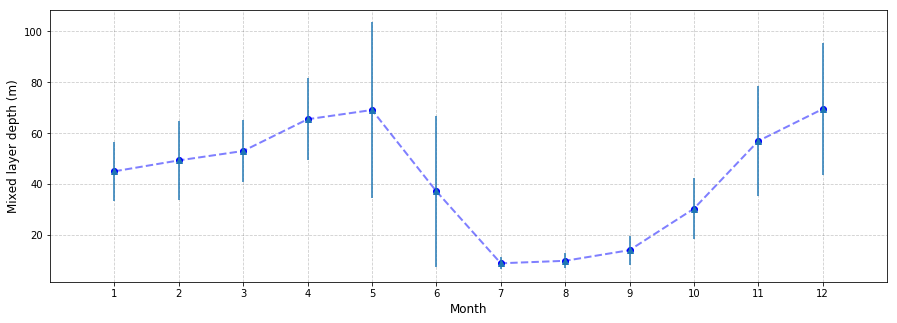

In [73]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = [january, february, march, april, may, june, july, august, september,october,november,december]
e = [januarystd, februarystd, marchstd, aprilstd, maystd, junestd, julystd, auguststd, septemberstd,octoberstd,novemberstd,decemberstd]

plt.figure(figsize=(15, 5))
plt.xlim((0,13))
# plt.ylim((0,65))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# # plt.title('Spring (AMJ) Mixed Layer Depth in Southern MAB', fontsize = 15)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12]) 
plt.errorbar(x, y, e, linestyle='None', marker='^')
# plt.yticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65])
plt.savefig('annualtrend_avgmonthly_timeseries_EGoM_withstd')
plt.show()